### IMPORTING ALL LIBRARIES

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

### LOADING AND PREPROCESSING DATA


In [2]:
train_data = pd.read_csv('train.csv')

# handling missing values
imputer = SimpleImputer(strategy='mean')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# convert categorical variables to numeric
encoder = LabelEncoder()
train_data['Sex'] = encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = encoder.fit_transform(train_data['Embarked'])

# feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[features]
y = train_data['Survived']


<ipython-input-2-bfe53dac3277>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


### DECISION TREE TRAINING AND FINE TUNING

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


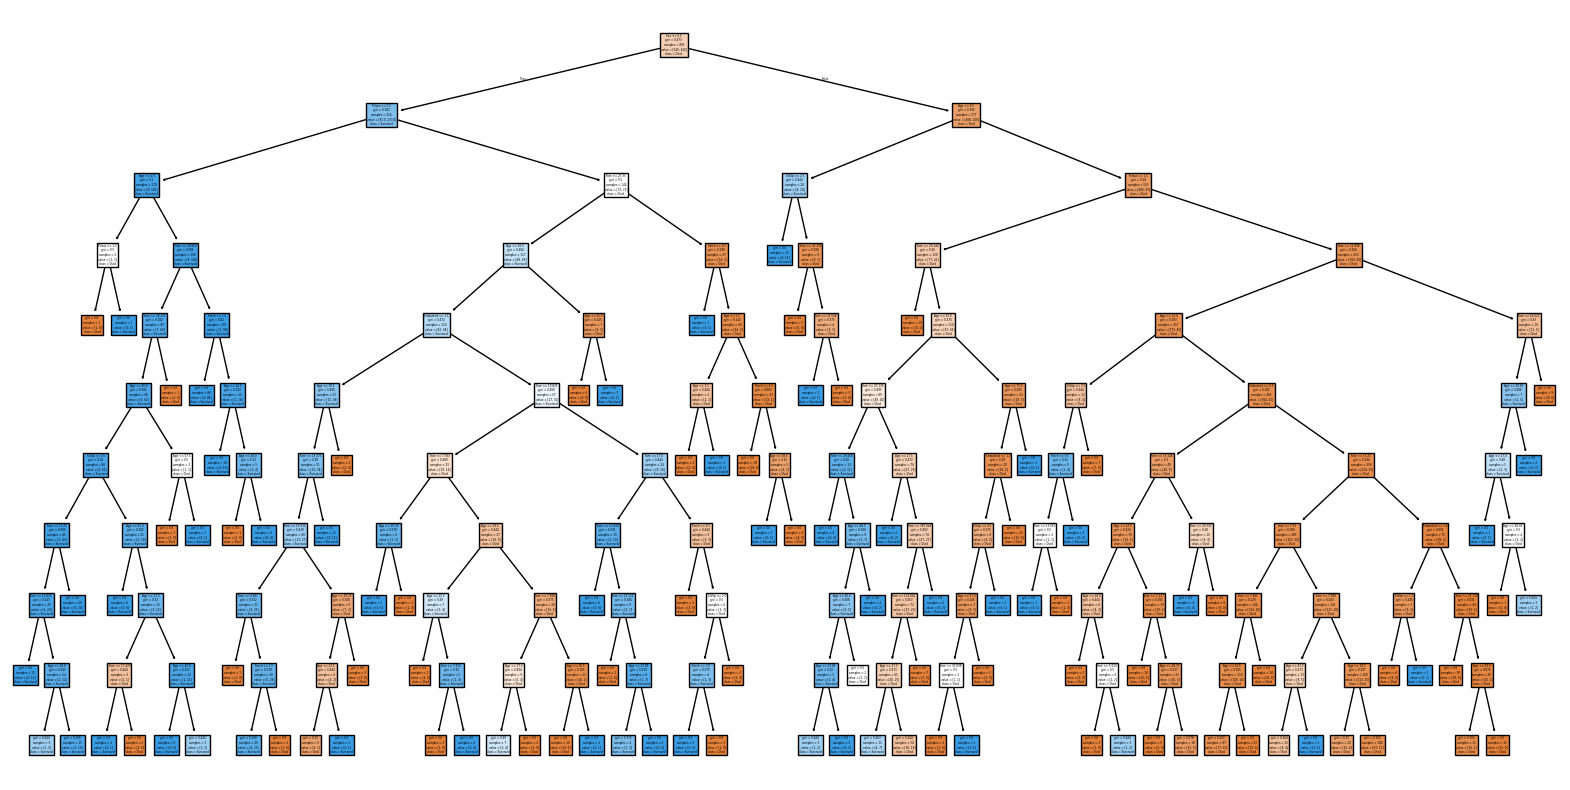

In [3]:
dt_params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X, y)
print(f"Best parameters for Decision Tree: {dt_grid.best_params_}")

# plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_grid.best_estimator_, filled=True, feature_names=features, class_names=['Died', 'Survived'])
plt.show()


### RANDOM FOREST TRAINING AND FINE TUNING

In [4]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X, y)
print(f"Best parameters for Random Forest: {rf_grid.best_params_}")


Best parameters for Random Forest: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


### CROSS VALIDATION AND COMPARISON

In [7]:
dt_score = cross_val_score(dt_grid.best_estimator_, X, y, cv=5, scoring='accuracy')
rf_score = cross_val_score(rf_grid.best_estimator_, X, y, cv=5, scoring='accuracy')

print(f"Average accuracy for Decision Tree: {np.mean(dt_score)}")
print(f"Average accuracy for Random Forest: {np.mean(rf_score)}")

if np.mean(dt_score) > np.mean(rf_score):
    print("Decision Tree performs better.")
else:
    print("Random Forest performs better.")

Average accuracy for Decision Tree: 0.8058565061829139
Average accuracy for Random Forest: 0.8328165212478815
Random Forest performs better.
